In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
np.set_printoptions(threshold=10)

## Dataset

In [3]:
X, y = datasets. load_iris(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (120, 4)
X_test shape :  (30, 4)
y_train shape :  (120,)
y_test shape :  (30,)


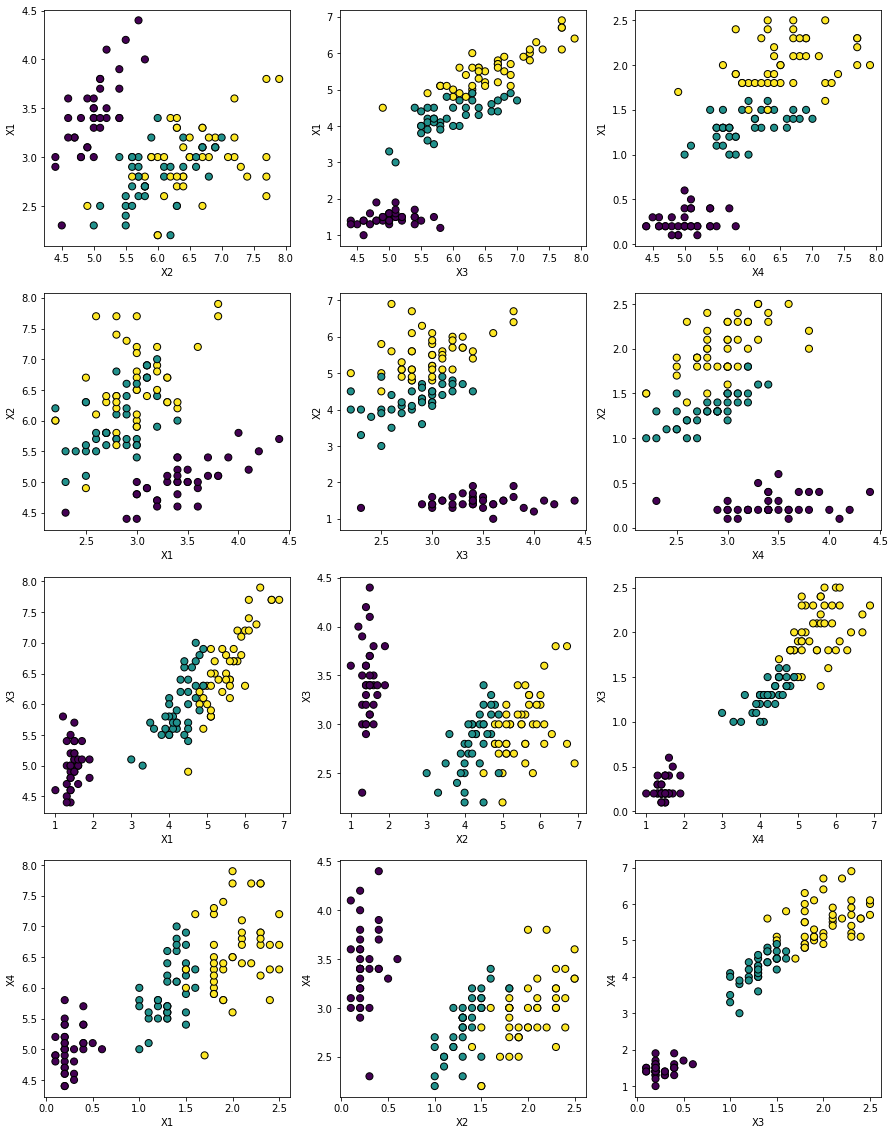

In [5]:
plt.figure(figsize=(15, 20))
n = 1
for i in range(4):
    x = [0, 1, 2, 3]
    x.remove(i)
    for j in range(3):
        plt.subplot(4, 3, n)
        plt.scatter(X_train[:, i], X_train[:, x[j]], c=y_train, ec='k', s=50)
        plt.xlabel(f'X{x[j] + 1}')
        plt.ylabel(f'X{i + 1}')
        n += 1

## K-Nearest Neighbors Classification Model

In [6]:
class KNNeighborsClassifier:
    def __init__(self, n_neighbors=7):
        self.n_neighbors = n_neighbors
        self.__X = None
        self.__y = None
        
    def __euclidean_distance(self, x1, x2):
        return np.sum((x1 - x2) ** 2, axis=-1) ** 0.5 
    
    def predict(self, X):
        if X.shape[-1] != self.__X.shape[-1]:
            raise f'shape mismatch {X.shape[-1]} != {self.__X.shape[-1]}, provide required number of features'
        class_labels = []
        for x in X:
            distances = self.__euclidean_distance(x, self.__X)
            indices = np.argsort(distances)[1: self.n_neighbors + 1]
            predicted_class = int(np.mean(self.__y[indices]))
            class_labels.append(predicted_class)
        return np.array(class_labels)
        
    def fit(self, X, y):
        self.__X = X
        self.__y = y
    
    def evaluate(self, X, y):
        '''returns accuracy of the model'''
        y_pred = self.predict(X)
        accuracy = np.mean(np.equal(y, y_pred))
        return accuracy

## Training and Evaluation

In [7]:
model = KNNeighborsClassifier()

In [8]:
model.fit(X_train, y_train)

In [9]:
train_acc = model.evaluate(X_train, y_train)
print('training accuracy : ', train_acc)

training accuracy :  0.9083333333333333


In [10]:
test_acc = model.evaluate(X_test, y_test)
print('testing accuracy : ', test_acc)

testing accuracy :  1.0


## Finding the Best Model

Text(0, 0.5, 'accuracy')

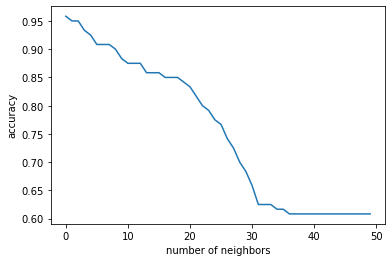

In [11]:
accuracy_per_k = []
for k in range(1, 51):
    model = KNNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc = model.evaluate(X_train, y_train)
    accuracy_per_k.append(train_acc)
plt.plot(accuracy_per_k)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')

### Chosing K (Number of Neighbours) = 5 

In [12]:
model = KNNeighborsClassifier(n_neighbors=15)

In [13]:
model.fit(X_train, y_train)

In [14]:
train_acc = model.evaluate(X_train, y_train)
print('training accuracy : ', train_acc)

training accuracy :  0.8583333333333333


In [15]:
test_acc = model.evaluate(X_test, y_test)
print('testing accuracy : ', test_acc)

testing accuracy :  0.9666666666666667


## Prediction Boundary

In [16]:
n_features = X_train.shape[-1]
xx = [0] * n_features
for i in range(n_features):
    xx[i] = np.arange(X_train[:, i].min() - 1, X_train[:, i].max() + 1, 0.1)

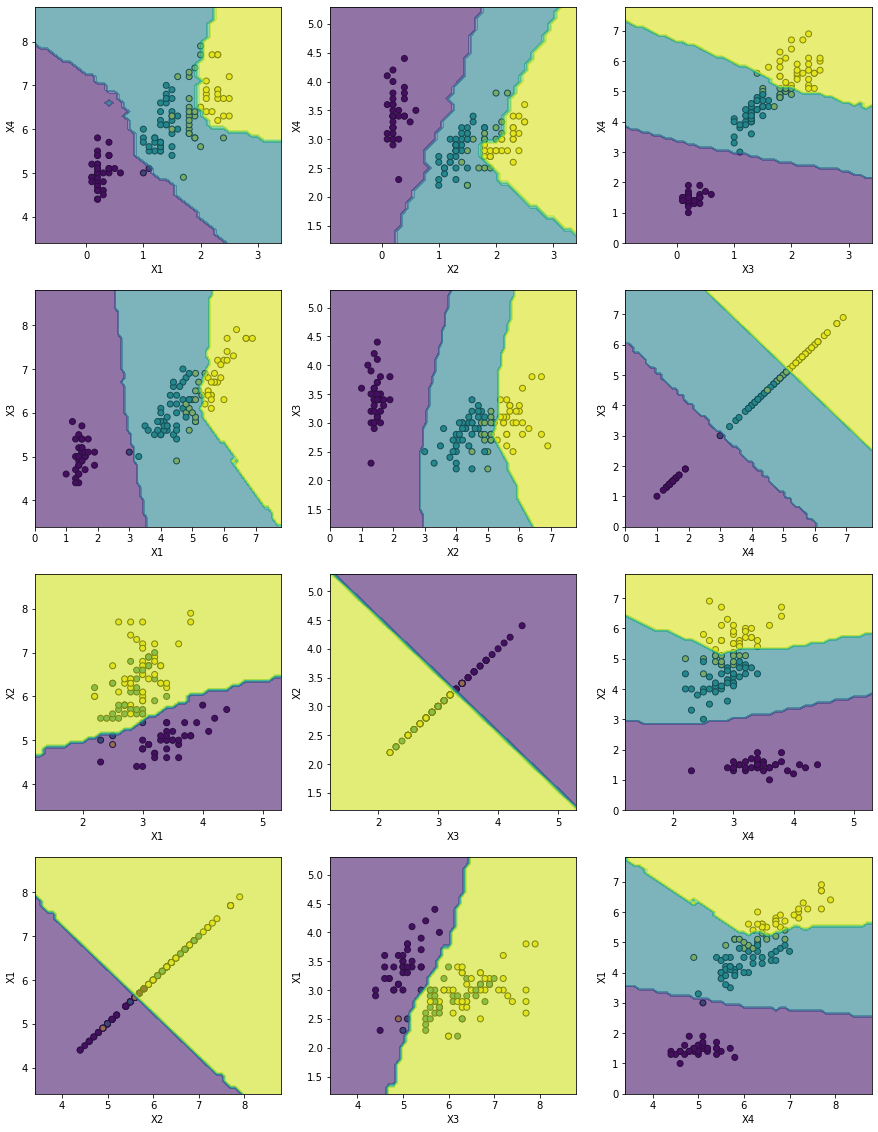

In [17]:
plt.figure(figsize=(15, 20))
n = 1
for i in range(3, -1, -1):
    x = [0, 1, 2, 3]
    x.remove(i)
    for j in range(3):
        plt.subplot(4, 3, n)
        
        data_train = np.c_[X_train[:, i], X_train[:, j]]
        model.fit(data_train, y_train)

        X, Y = np.meshgrid(xx[i], xx[j])
        data_test = np.c_[X.ravel(), Y.ravel()]
        data_pred = model.predict(data_test)

        Z = data_pred.reshape(xx[j].shape[0], xx[i].shape[0])

        plt.scatter(X_train[:, i], X_train[:, j], c=y_train, ec='k')
        plt.contourf(xx[i], xx[j], Z, alpha=0.6)
        
        plt.xlabel(f'X{x[j] + 1}')
        plt.ylabel(f'X{i + 1}')
        n += 1